# Project 02 - Due Friday, November 11 at 12pm

*Objectives*: Gain experience loading a transactional dataset into a relational database model you define yourself and using SQL to explore its contents. Transform the data into a star schema, documenting the schema visually, and explore the transformed data analytically by writing and executing a number of SQL queries using common syntax and functions and describing your findings.  Gain practice working on these tasks with a partner.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries, diagrams, and charts in the space provided, unless a text answer is requested.  The notebook itself should be completely reproducible at datanotebook.org, from start to finish: another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Attestation*: **Work in pairs**.  At the end of your submitted notebook, identify the work each partner performed and attest that each contributed substantially to the work.

*Deadline*: Friday, November 11, 12pm.  One member of each pair must submit your notebook to Blackboard; you should not both submit it separately.  You may each push a copy to your own GitHub repository.


## Setup - select and obtain data

The US City Open Data Census has a variety of [transactional data from all over the country](http://us-city.census.okfn.org/).  Select one topic and one city from this Census, download the data, and explain your reason for this choice before proceeding.  Provide a link to the web page for the data set you've chosen.

I strongly encourage you to select a dataset from among the following topics:  Crime, Property Assessment, Campaign Finance Contributions, Service Requests (311), and Web Analytics.

By *transactional* data I mean records at the grain of one event per business process.  In the case of Service Requests (311), for example, that would require data at the level of each individual report of a service request.  If this isn't clear, think about the bike trip data - each individual ride was included - and look for data at that level of event/process specificity.  Avoid data like the Connecticut boating data, which was summarized by year, not individual transactions.

Please aim for a dataset of at least 10,000 individual records, but less than 250,000 records.  A little more or a little less is okay, but try to stay within these limits.

## Problem 1 - examine the data (20 points)

Use `csvstat`, `pandas`, or other tools as you see fit and observe the contents of your dataset.  Review important points from any metadata provided.  Describe what you see:  What do the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some opportunities, challenges, or questions you would like to ask?

### 1. Use the attached link to get raw data below. 
(the data represent criminal offenses according to New York State Penal Law definition)

In [7]:
!wget https://data.cityofnewyork.us/api/views/hyij-8hr7/rows.csv

--2016-11-09 15:27:08--  https://data.cityofnewyork.us/api/views/hyij-8hr7/rows.csv
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.140.199
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 194111037 (185M) [text/csv]
Saving to: ‘rows.csv’

rows.csv            100%[===================>] 185.12M  7.59MB/s    in 35s     

Last-modified header invalid -- time-stamp ignored.
2016-11-09 15:27:43 (5.29 MB/s) - ‘rows.csv’ saved [194111037/194111037]



### 2. A"smell test" of the rawdata 
Check the size (row numbers) and the column names of the data set

In [8]:
!wc -l rows.csv

1123466 rows.csv


In [9]:
!csvcut -n rows.csv

  1: OBJECTID
  2: Identifier
  3: Occurrence Date
  4: Day of Week
  5: Occurrence Month
  6: Occurrence Day
  7: Occurrence Year
  8: Occurrence Hour
  9: CompStat Month
 10: CompStat Day
 11: CompStat Year
 12: Offense
 13: Offense Classification
 14: Sector
 15: Precinct
 16: Borough
 17: Jurisdiction
 18: XCoordinate
 19: YCoordinate
 20: Location 1


### Ooops, something goes wrong...
Since there are above 1 million raw data, the csv commands won't work at all.
So we decided to choose the June and Dec part in 2015 of raw data to roughly stand for the summer months and winter and uploaded the new csv file on Github.
Sorry but we need to get the data and do some "smell test" again.

In [22]:
!csvgrep -c7 -m 2015 rows.csv > NYC2015crime.csv 

In [23]:
!csvgrep -c5 -m 'Jun' NYC2015crime.csv > mydata.csv

In [24]:
!csvgrep -c5 -m 'Dec' NYC2015crime.csv >> mydata.csv

In [25]:
!wc -l mydata.csv

16862 mydata.csv


In [3]:
!csvcut -n mydata.csv

  1: OBJECTID
  2: Identifier
  3: Occurrence Date
  4: Day of Week
  5: Occurrence Month
  6: Occurrence Day
  7: Occurrence Year
  8: Occurrence Hour
  9: CompStat Month
 10: CompStat Day
 11: CompStat Year
 12: Offense
 13: Offense Classification
 14: Sector
 15: Precinct
 16: Borough
 17: Jurisdiction
 18: XCoordinate
 19: YCoordinate
 20: Location 1


In [1]:
!time csvstat mydata.csv

  1. OBJECTID
	<class 'str'>
	Nulls: False
	Unique values: 16861
	Max length: 8
  2. Identifier
	<class 'str'>
	Nulls: False
	Unique values: 16861
	Max length: 10
  3. Occurrence Date
	<class 'str'>
	Nulls: False
	Unique values: 8407
	5 most frequent values:
		06/01/2015 12:00:00 PM:	23
		06/12/2015 12:00:00 PM:	18
		06/01/2015 09:00:00 AM:	18
		06/11/2015 12:00:00 PM:	15
		12/11/2015 05:00:00 PM:	14
	Max length: 22
  4. Day of Week
	<class 'str'>
	Nulls: False
	Unique values: 8
	5 most frequent values:
		Tuesday:	2726
		Monday:	2555
		Wednesday:	2426
		Friday:	2401
		Thursday:	2333
	Max length: 11
  5. Occurrence Month
	<class 'str'>
	Nulls: False
	Values: Jun, Dec, Occurrence Month
  6. Occurrence Day
	<class 'str'>
	Nulls: False
	Unique values: 32
	5 most frequent values:
		12:	628
		18:	625
		11:	610
		1:	603
		19:	603
	Max length: 14
  7. Occurrence Year
	<class 'str'>
	Nulls: False
	Values: Occurrence Year, 2015
  8. Occurrence Hour
	<class 'str'>
	Nulls: False
	Unique values: 25

### Things to clarify: 
We try to run the csvcommand but we can't even when we reduce the datasize to 8000. It may happens the same when trying to run the csvstat on datanotebook.org. Since null value in columns will make some issues to the following steps, we assume in the first place that there's a possibility every column in the dataset has null values and deal with them later with SQL.

### About the dataset:
The dataset is downloaded from https://data.cityofnewyork.us/Public-Safety/NYPD-7-Major-Felony-Incidents/hyij-8hr7

#### Mainidea:

The whole data set is about Seven Major Felonies at the incident level, collected by NYPD. For privacy reasons, incidents have been moved to the midpoint of the street segment on which they occur. The total data volume is 1123466.
The seven major felonies are: .......

#### Description of column names:


| Column Name | Description|
| -----------|------------|
|Identifier|Unique identifier for each complaint|
|Day of Week|Text representation of day of week on which the incident occurred|
|Occurrence Month|Three character abbreviation of month in which the incident occurred|
|Occurrence Day|Integer representation of day of month in which the incident occurred|
|Occurrence Year|Integer representation of year in which the incident occurred|
|Occurrence Hour|Integer representation of time when the incident occurred; based on 24 hour clock|
|CompStat Month|Three character abbreviation of month in which the incident was reported|
|CompStat Day|Integer representation of day of month in which the incident was reported|
|CompStat Year|Integer representation of year in which the incident was reported|
|Offense|Type of offense; currently aligned with the FBIs seven major felonies. GLMV is the same as Grand Larceny of Motor Vehicle|
|Offense Classification|Level of offense; felony, misdemeanor, violation|
|Sector|Single character indicating patrol sector within given precinct|
|Precinct|Three character representation of precinct in which incident occurred|
|Borough|Text representation of borough in which incident occurred|
|Jurisdiction|Internal jurisdiction responsible for incident (eg. NYPD, Transit or Housing)|
|X-Coordinate|X-Coordinate for New York State Plane Coordinate System|
|Y-Coordinate|Y-Coordinate for New York State Plane Coordinate System|
|Location1|(Coordinate value in decimal degrees, Coordinate value in decimal degrees)|

#### A List of Questions for further exploration:

Given this dataset, we are interested in:

1.Which time period is more likely for a crime to occur: morning, afternoon or evening? Why?

2.Which season is more likely for a crime to occur: spring, summer, fall or winter? Why?

3.Which weekday, from Sunday to Saturday, is more likely for a crime to occur? Why?

4.Which of the above three factors is more influential in crime occurence? Are the kind of crime appear to be of same probability to happen?

## Problem 2 - define a database model, load the data, and explore (20 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset as it is in its raw form into the database, and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Explore the data to zero in on a few themes you would like to further study analytically.  Discuss columns that present opportunities for extraction into dimensions, and identify the specific columns that contain facts you want to measure.

### 3. Creat a database and connect to it

Create a user name called project2 and connect to it.

In [1]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [2]:
!createdb -U dbuser project2

In [3]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [4]:
%sql postgresql://dbuser@localhost:5432/project2

'Connected: dbuser@project2'

### 4. Creat a SQL table and load the data

In the folowing steps, we create a data table called NYC2015crime and load data from NYC2015.csv into this table. To eliminate ambiguities, we delete other table called NYC2015crime before creating our new table.

In [5]:
%%sql
DROP TABLE IF EXISTS NYC2015crime;
CREATE TABLE NYC2015crime (
    OBJECTID CHAR(20),
    IDENTIFIER CHAR(9),
    OCURRENCE_DATE VARCHAR(40),
    DAY_OF_WEEK CHAR(10),
    OCURRENCE_MONTH CHAR(3),
    OCURRENCE_DAY CHAR(10),
    OCURRENCE_YEAR CHAR(10),
    OCURRENCE_HOUR CHAR(10),
    COMPSTAT_MONTH CHAR(10),
    COMPSTAT_DAY CHAR(10),
    COMPSTAT_YEAR CHAR(10),
    OFFENSE VARCHAR(225),
    OFFENSE_CLASS CHAR(6),
    SECTOR CHAR(4),
    PRECINT CHAR(10),
    BOROUGH VARCHAR(40),
    JURISDICT VARCHAR(225),
    XCOR CHAR(40),
    YCOR CHAR(40),
    LOCATION VARCHAR(100)
    )

Done.
Done.


[]

In [6]:
!pwd

/home/jovyan/work


In [7]:
%%sql
COPY NYC2015crime FROM '/home/jovyan/work/NYC2015crime.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ','
;

102657 rows affected.


[]

In [8]:
%%sql
SELECT COUNT(*) FROM NYC2015crime

1 rows affected.


count
102657


The number of rows in our new data table -- NYC2015crime is 102657, plus a header line, this number is equal to the row number in the original datafile, NYC2015.csv, indicates that all the data has load correctly.

### 5. Identify and deal with null values

In [9]:
%%sql
SELECT * FROM NYC2015crime WHERE OBJECTID IS NULL OR OBJECTID = '';
SELECT * FROM NYC2015crime WHERE IDENTIFIER IS NULL OR IDENTIFIER = '';
SELECT * FROM NYC2015crime WHERE OCURRENCE_DATE IS NULL OR OCURRENCE_DATE = '';
SELECT * FROM NYC2015crime WHERE DAY_OF_WEEK IS NULL OR DAY_OF_WEEK = '';
SELECT * FROM NYC2015crime WHERE OCURRENCE_MONTH IS NULL OR OCURRENCE_MONTH = '';
SELECT * FROM NYC2015crime WHERE OCURRENCE_DAY IS NULL OR OCURRENCE_DAY = '';
SELECT * FROM NYC2015crime WHERE OCURRENCE_YEAR IS NULL OR OCURRENCE_YEAR = '';
SELECT * FROM NYC2015crime WHERE OCURRENCE_HOUR IS NULL OR OCURRENCE_HOUR = '';
SELECT * FROM NYC2015crime WHERE COMPSTAT_MONTH IS NULL OR COMPSTAT_MONTH = '';
SELECT * FROM NYC2015crime WHERE COMPSTAT_DAY IS NULL OR COMPSTAT_DAY = '';
SELECT * FROM NYC2015crime WHERE COMPSTAT_YEAR IS NULL OR COMPSTAT_YEAR = '';
SELECT * FROM NYC2015crime WHERE OFFENSE IS NULL OR OFFENSE = '';
SELECT * FROM NYC2015crime WHERE OFFENSE_CLASS IS NULL OR OFFENSE_CLASS = '';
SELECT * FROM NYC2015crime WHERE SECTOR IS NULL OR SECTOR = '';
SELECT * FROM NYC2015crime WHERE PRECINT IS NULL OR PRECINT = '';
SELECT * FROM NYC2015crime WHERE BOROUGH IS NULL OR BOROUGH = '';
SELECT * FROM NYC2015crime WHERE JURISDICT IS NULL OR JURISDICT = '';
SELECT * FROM NYC2015crime WHERE XCOR IS NULL OR XCOR = '';
SELECT * FROM NYC2015crime WHERE YCOR IS NULL OR YCOR = '';
SELECT * FROM NYC2015crime WHERE LOCATION IS NULL OR LOCATION = '';

0 rows affected.
0 rows affected.
0 rows affected.
0 rows affected.
0 rows affected.
0 rows affected.
0 rows affected.
0 rows affected.
0 rows affected.
0 rows affected.
0 rows affected.
0 rows affected.
0 rows affected.
2047 rows affected.
0 rows affected.
11 rows affected.
0 rows affected.
0 rows affected.
0 rows affected.
0 rows affected.


objectid,identifier,ocurrence_date,day_of_week,ocurrence_month,ocurrence_day,ocurrence_year,ocurrence_hour,compstat_month,compstat_day,compstat_year,offense,offense_class,sector,precint,borough,jurisdict,xcor,ycor,location


We can see from the above result that columns: borough and sector contain NULL values, so we have to eliminate them before building the star schema.

In [10]:
%%sql
DELETE FROM NYC2015crime 
WHERE BOROUGH IS NULL 
OR BOROUGH = '';

DELETE FROM NYC2015crime 
WHERE SECTOR IS NULL 
OR SECTOR = '';

11 rows affected.
2047 rows affected.


[]

### 6. Some further exploration and preparation

Since we are interested in how number of crime will vary with seasons, we add a new column in the data table called "season", and define the value of it using original column: OCURRENCE_MONTH.

In [11]:
%%sql
ALTER TABLE NYC2015crime
    ADD season CHAR(10);

Done.


[]

In [12]:
%%sql
UPDATE NYC2015crime SET 
season =
    CASE 
     WHEN OCURRENCE_MONTH IN ('Mar','Apr','May') then 'Spring'
     WHEN OCURRENCE_MONTH IN ('Jun','Jul','Aug') then 'Summer'   
     WHEN OCURRENCE_MONTH IN ('Sep','Oct','Nov') then 'Fall'
     WHEN OCURRENCE_MONTH IN ('Dec','Jan','Feb') then 'Winter'
        else NULL end;

100599 rows affected.


[]

We are also interested in whether number of crimes will vary over different time period in one day, we add a new column called "time", and define the value of it using the original column: OCURRENCE_HOUR.

In [13]:
%%sql
ALTER TABLE NYC2015crime
    ADD time CHAR(10);

Done.


[]

In [14]:
%%sql
UPDATE NYC2015crime SET 
time =
    CASE 
     WHEN OCURRENCE_HOUR IN ('6','7','8','9','10','11','12','13') then 'Morning'
     WHEN OCURRENCE_HOUR IN ('14','15','16','17','18','19','20','21') then 'Afternoon'   
     WHEN OCURRENCE_HOUR IN ('22','23','0','1','2','3','4','5') then 'Evening'
        else NULL end;

100599 rows affected.


[]

The following code is to verify whether we have inserted the new column correctly.

In [15]:
%%sql
SELECT * FROM NYC2015crime 
LIMIT 10;

10 rows affected.


objectid,identifier,ocurrence_date,day_of_week,ocurrence_month,ocurrence_day,ocurrence_year,ocurrence_hour,compstat_month,compstat_day,compstat_year,offense,offense_class,sector,precint,borough,jurisdict,xcor,ycor,location,season,time
714273,54f62b78,02/13/2015 07:30:00 AM,Friday,Feb,13,2015,7,3,3,2015,RAPE,FELONY,B,34,MANHATTAN,N.Y. POLICE DEPT,1002106,249501,"(40.8514877740001, -73.9354579669999)",Winter,Morning
714920,82a279d7,02/13/2015 12:40:00 PM,Friday,Feb,13,2015,12,2,13,2015,FELONY ASSAULT,FELONY,D,19,MANHATTAN,N.Y. POLICE DEPT,997162,223853,"(40.7810998160001, -73.9533782139999)",Winter,Morning
715546,ce956407,02/13/2015 02:00:00 PM,Friday,Feb,13,2015,14,2,13,2015,BURGLARY,FELONY,C,102,QUEENS,N.Y. POLICE DEPT,1028241,192139,"(40.6939528280001, -73.841364287)",Winter,Afternoon
715868,8a0c4bb8,02/13/2015 03:20:00 PM,Friday,Feb,13,2015,15,2,13,2015,GRAND LARCENY,FELONY,F,84,BROOKLYN,N.Y. POLICE DEPT,988175,190975,"(40.690866375, -73.9858480569999)",Winter,Afternoon
718126,4daede75,02/15/2015 12:25:00 AM,Sunday,Feb,15,2015,0,2,15,2015,ROBBERY,FELONY,M,19,MANHATTAN,N.Y. POLICE DEPT,998837,224878,"(40.7839105640001, -73.947327824)",Winter,Evening
719097,db595558,02/15/2015 05:15:00 AM,Sunday,Feb,15,2015,5,2,15,2015,FELONY ASSAULT,FELONY,G,42,BRONX,N.Y. HOUSING POLICE,1009394,242828,"(40.8331545990001, -73.9091393109999)",Winter,Evening
721024,2f733b4b,02/15/2015 10:00:00 PM,Sunday,Feb,15,2015,22,2,15,2015,ROBBERY,FELONY,C,71,BROOKLYN,N.Y. POLICE DEPT,995675,180124,"(40.6610763210001, -73.958821762)",Winter,Evening
721025,7493f2f4,02/15/2015 10:00:00 PM,Sunday,Feb,15,2015,22,2,19,2015,GRAND LARCENY OF MOTOR VEHICLE,FELONY,I,75,BROOKLYN,N.Y. POLICE DEPT,1022154,184001,"(40.671644058, -73.863360523)",Winter,Evening
721346,96517d23,04/16/2015 12:50:00 AM,Thursday,Apr,16,2015,0,4,16,2015,ROBBERY,FELONY,H,72,BROOKLYN,N.Y. POLICE DEPT,983562,173911,"(40.644030329, -74.0024806)",Spring,Evening
722000,9bc5eee2,04/16/2015 08:30:00 AM,Thursday,Apr,16,2015,8,4,16,2015,BURGLARY,FELONY,G,68,BROOKLYN,N.Y. POLICE DEPT,973049,165604,"(40.6212223140001, -74.040349642)",Spring,Morning


## Problem 3 - define a star schema, and load your data into it (30 points)

Define a star schema consisting of at least one fact table and at least two dimensions.  Transform your source data into the new fact table and dimensions.  Discuss your key modeling decisions.

Document your star schema with a diagram.  There several tools available for this, such as Google Docs and Microsoft Visio.

### Import the general picture of star schema

In [8]:
from IPython.display import Image
PATH = "/home/xinyuan/Downloads/"

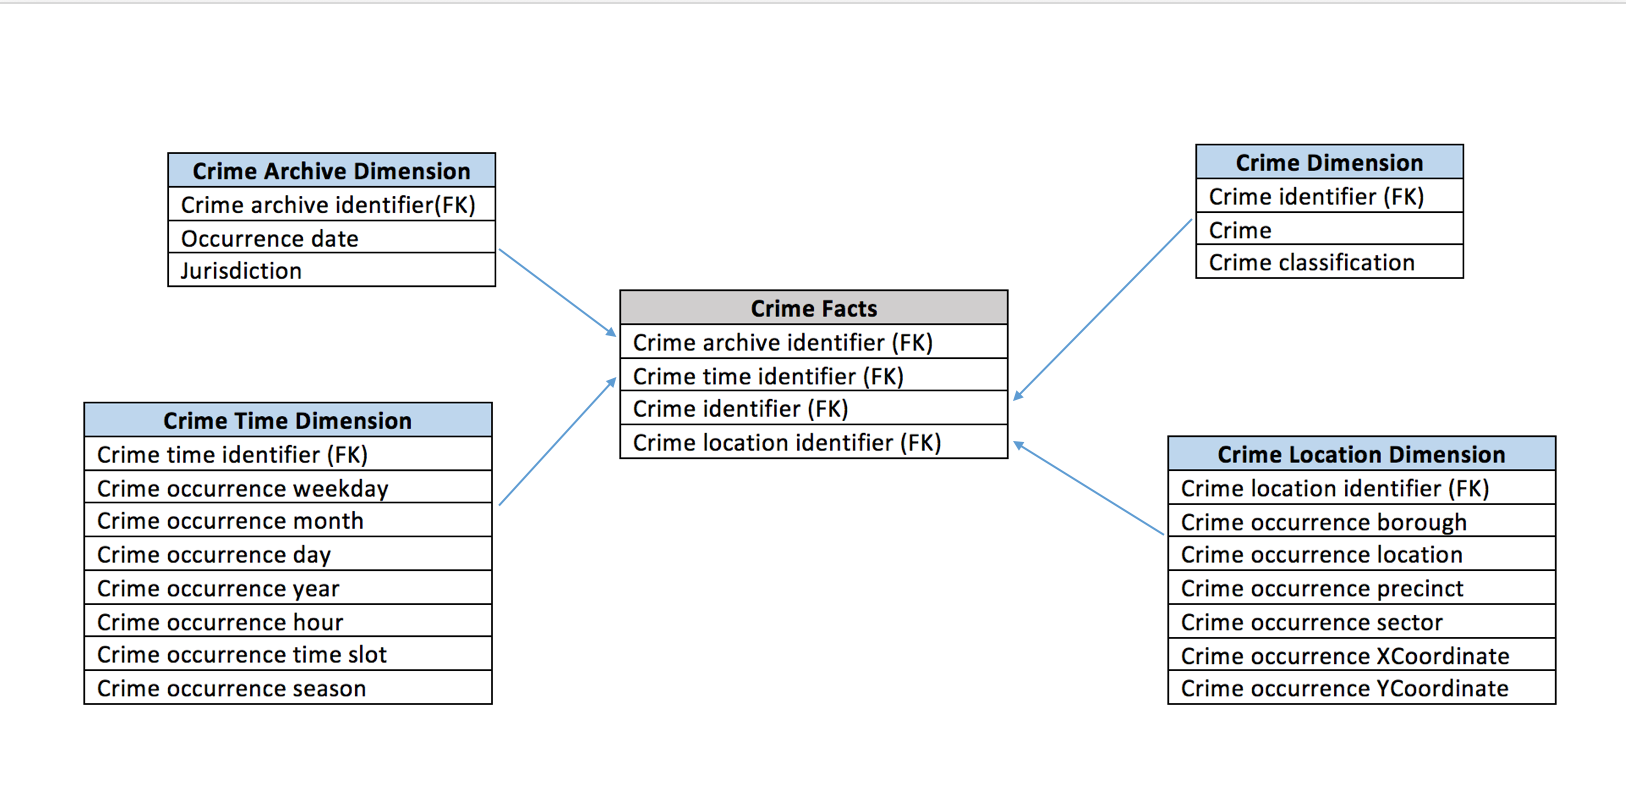

In [9]:
Image(filename = PATH + "star_schema.png")

### 7. Create dimension tables of star schema

#### The following commands create the Crime Archive Dimension Table

In [16]:
%%sql
DROP TABLE IF EXISTS crime_archive_dimension;
CREATE TABLE crime_archive_dimension (
  arch_id VARCHAR(27) PRIMARY KEY,
  occur_date VARCHAR(40),
  jurisdiction CHAR(225)  
);

Done.
Done.


[]

In [17]:
%%sql
INSERT INTO crime_archive_dimension (arch_id, occur_date, jurisdiction)
SELECT IDENTIFIER, OCURRENCE_DATE, JURISDICT 
FROM NYC2015crime;

100599 rows affected.


[]

In [18]:
%%sql
SELECT * FROM crime_archive_dimension
LIMIT 10;

10 rows affected.


arch_id,occur_date,jurisdiction
2f733b4b,02/15/2015 10:00:00 PM,N.Y. POLICE DEPT
7493f2f4,02/15/2015 10:00:00 PM,N.Y. POLICE DEPT
96517d23,04/16/2015 12:50:00 AM,N.Y. POLICE DEPT
9bc5eee2,04/16/2015 08:30:00 AM,N.Y. POLICE DEPT
23462b44,04/16/2015 10:50:00 AM,N.Y. POLICE DEPT
41663dcb,04/16/2015 02:30:00 PM,N.Y. POLICE DEPT
5922e1e9,04/16/2015 02:35:00 PM,N.Y. POLICE DEPT
f6f8cd7d,04/16/2015 02:40:00 PM,N.Y. POLICE DEPT
b0cfbac1,05/22/2015 11:10:00 AM,N.Y. POLICE DEPT
fc3f9f92,05/22/2015 02:20:00 PM,N.Y. HOUSING POLICE


#### The following commands create the Crime Time Dimension Table

In [19]:
%%sql
DROP TABLE IF EXISTS crime_time_dimension;
CREATE TABLE crime_time_dimension (
  crime_time_id SERIAL PRIMARY KEY,
  crime_occur_weekday CHAR(10),
  crime_occur_month CHAR(3),
  crime_occur_day CHAR(10),
  crime_occur_year CHAR(10),
  crime_occur_hour CHAR(10),
  crime_occur_timeslot CHAR(10),
  crime_occur_season CHAR(6)  
);

Done.
Done.


[]

In [20]:
%%sql
INSERT INTO crime_time_dimension (
    crime_occur_weekday, 
    crime_occur_month, 
    crime_occur_day, 
    crime_occur_year, 
    crime_occur_hour, 
    crime_occur_timeslot, 
    crime_occur_season)
SELECT DAY_OF_WEEK, OCURRENCE_MONTH, OCURRENCE_DAY, OCURRENCE_YEAR, OCURRENCE_HOUR, TIME, SEASON
FROM NYC2015crime;

100599 rows affected.


[]

In [21]:
%%sql
SELECT * FROM crime_time_dimension
LIMIT 10;

10 rows affected.


crime_time_id,crime_occur_weekday,crime_occur_month,crime_occur_day,crime_occur_year,crime_occur_hour,crime_occur_timeslot,crime_occur_season
1,Sunday,Feb,15,2015,22,Evening,Winter
2,Sunday,Feb,15,2015,22,Evening,Winter
3,Thursday,Apr,16,2015,0,Evening,Spring
4,Thursday,Apr,16,2015,8,Morning,Spring
5,Thursday,Apr,16,2015,10,Morning,Spring
6,Thursday,Apr,16,2015,14,Afternoon,Spring
7,Thursday,Apr,16,2015,14,Afternoon,Spring
8,Thursday,Apr,16,2015,14,Afternoon,Spring
9,Friday,May,22,2015,11,Morning,Spring
10,Friday,May,22,2015,14,Afternoon,Spring


#### The following commands create the Crime Dimension Table

In [22]:
%%sql
DROP TABLE IF EXISTS crime_dimension;
CREATE TABLE crime_dimension(
crime_id SERIAL PRIMARY KEY,
crime VARCHAR(225),
crime_class CHAR(6)
);

Done.
Done.


[]

In [23]:
%%sql
INSERT INTO crime_dimension(crime, crime_class)
SELECT OFFENSE, OFFENSE_CLASS FROM NYC2015crime;

100599 rows affected.


[]

In [24]:
%%sql
SELECT * FROM crime_dimension
LIMIT 10;

10 rows affected.


crime_id,crime,crime_class
1,ROBBERY,FELONY
2,GRAND LARCENY OF MOTOR VEHICLE,FELONY
3,ROBBERY,FELONY
4,BURGLARY,FELONY
5,GRAND LARCENY,FELONY
6,GRAND LARCENY,FELONY
7,FELONY ASSAULT,FELONY
8,GRAND LARCENY,FELONY
9,GRAND LARCENY OF MOTOR VEHICLE,FELONY
10,FELONY ASSAULT,FELONY


#### The following commands create the Crime Location Dimension Table

In [25]:
%%sql
DROP TABLE IF EXISTS crime_location_dimension;
CREATE TABLE crime_location_dimension(
crime_location_id SERIAL PRIMARY KEY,
borough VARCHAR(40),
location VARCHAR(100),
precinct CHAR(10),
sector CHAR(4),
Xcoordinate CHAR(40), 
Ycoordinate CHAR(40)
);

Done.
Done.


[]

In [26]:
%%sql
INSERT INTO crime_location_dimension(borough,location,precinct,sector,Xcoordinate,Ycoordinate)
SELECT BOROUGH,LOCATION,PRECINT,SECTOR,XCOR,YCOR 
FROM NYC2015crime;

100599 rows affected.


[]

In [27]:
%%sql
SELECT * FROM crime_location_dimension
LIMIT 10;

10 rows affected.


crime_location_id,borough,location,precinct,sector,xcoordinate,ycoordinate
1,BROOKLYN,"(40.6610763210001, -73.958821762)",71,C,995675,180124
2,BROOKLYN,"(40.671644058, -73.863360523)",75,I,1022154,184001
3,BROOKLYN,"(40.644030329, -74.0024806)",72,H,983562,173911
4,BROOKLYN,"(40.6212223140001, -74.040349642)",68,G,973049,165604
5,BROOKLYN,"(40.688465142, -73.937635025)",81,D,1001546,190106
6,MANHATTAN,"(40.8122676570001, -73.957084521)",26,D,996130,235208
7,BRONX,"(40.8364565750001, -73.902521453)",42,B,1011224,244033
8,STATEN ISLAND,"(40.602585735, -74.1314053369999)",121,G,947761,158839
9,BROOKLYN,"(40.630847128, -74.001849635)",66,H,983737,169108
10,MANHATTAN,"(40.859200822, -73.922761528)",34,C,1005616,252314


### 8. Create fact table and link it to dimension tables

In [28]:
%%sql
DROP TABLE IF EXISTS crime_facts;
CREATE TABLE crime_facts(
crime_archive_ID VARCHAR(30),
crime_time_ID SERIAL,
crime_ID SERIAL,
crime_location_ID SERIAL
);

Done.
Done.


[]

In [29]:
%%sql
INSERT INTO crime_facts(crime_archive_ID)
SELECT arch_id FROM crime_archive_dimension;

100599 rows affected.


[]

In [30]:
%%sql
SELECT * FROM crime_facts
LIMIT 10;

10 rows affected.


crime_archive_id,crime_time_id,crime_id,crime_location_id
2f733b4b,1,1,1
7493f2f4,2,2,2
96517d23,3,3,3
9bc5eee2,4,4,4
23462b44,5,5,5
41663dcb,6,6,6
5922e1e9,7,7,7
f6f8cd7d,8,8,8
b0cfbac1,9,9,9
fc3f9f92,10,10,10


In [31]:
%%sql
ALTER TABLE crime_facts
ADD CONSTRAINT crime_time_ID FOREIGN KEY (crime_time_id)
REFERENCES crime_time_dimension (crime_time_id) ON DELETE NO ACTION

Done.


[]

In [32]:
%%sql
ALTER TABLE crime_facts
ADD CONSTRAINT crime_ID FOREIGN KEY (crime_id)
REFERENCES crime_dimension (crime_id) ON DELETE NO ACTION

Done.


[]

In [33]:
%%sql
ALTER TABLE crime_facts
ADD CONSTRAINT crime_location_ID FOREIGN KEY (crime_location_id)
REFERENCES crime_location_dimension (crime_location_id) ON DELETE NO ACTION;

Done.


[]

In [34]:
%%sql
SELECT * FROM crime_facts
LIMIT 10;

10 rows affected.


crime_archive_id,crime_time_id,crime_id,crime_location_id
2f733b4b,1,1,1
7493f2f4,2,2,2
96517d23,3,3,3
9bc5eee2,4,4,4
23462b44,5,5,5
41663dcb,6,6,6
5922e1e9,7,7,7
f6f8cd7d,8,8,8
b0cfbac1,9,9,9
fc3f9f92,10,10,10


## Problem 4 - explore your data in its new schema (30 points)

Strictly using the dimensional model tables you defined and populated for Problem 3, explore your data in its new form.  Use any of the query strategies we've seen in class, including transformations, aggregates, subqueries, rollups, and, of course, joins.  Add plots to highlight particular themes that stand out.  Describe your thinking and observations along the way.

#### We first explore how number of crime varies with timeslot, season and weekdays. Luckily, we have all that data in the dimension table: crime_time_dimension.

In [35]:
%%sql
SELECT COUNT(*) AS crimenumber_day,crime_occur_timeslot
FROM crime_time_dimension
GROUP BY crime_occur_timeslot
ORDER BY crimenumber_day;

3 rows affected.


crimenumber_day,crime_occur_timeslot
28949,Evening
29180,Morning
42470,Afternoon


number of crime occurred in different time period


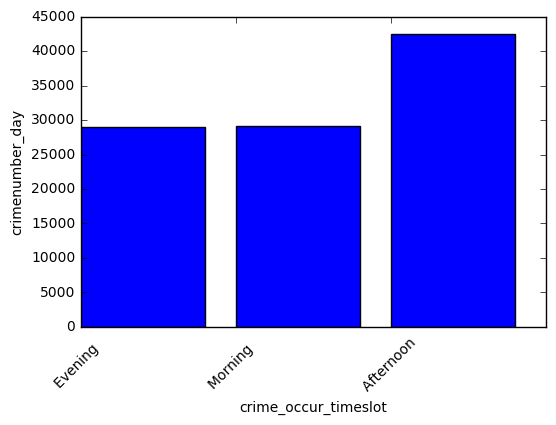

In [37]:
result = _
result.bar()
!echo 'number of crime occurred in different time period'

The above table and graph show the total number of crime occurred in different time period in a certain day. 
We can see from the table that the total crime number in morning(6:00--14:00), afternoon(15:00--22:00) and evening(23:00--6:00) equals 29180, 28949 and 42470 respectively.

Before the data analysis, we expected evening to have a higher crime occurance rate, however, the result shows that, the number of crime occurred in afternoon is greatly higher than that of morning and evening. The reason behind it may be: Compared to the other two time periods, people are more willing to go outside during afternoon，thus potential criminals are more likely to find their targets and take actions.

In [38]:
%%sql
SELECT COUNT(*) AS crimenumber_season,crime_occur_season
FROM crime_time_dimension
GROUP BY crime_occur_season
ORDER BY crimenumber_season;

4 rows affected.


crimenumber_season,crime_occur_season
22144,Winter
23990,Spring
26906,Fall
27559,Summer


number of crime occurred in different season, 2015


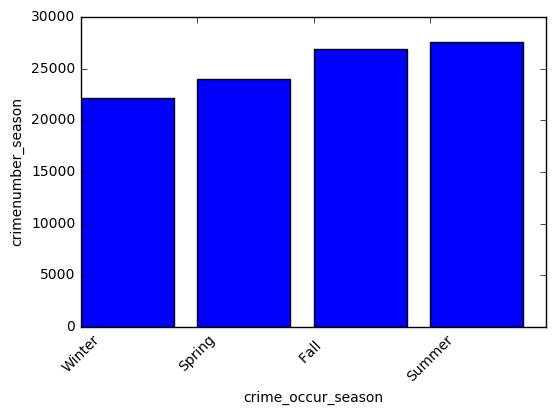

In [39]:
result =_
result.bar()
!echo 'number of crime occurred in different season, 2015'

The above result shows that, summer owns the highest number of crime, which is 27559, followed  by fall, 26906. Compared to the bbbother three, winter has the lowest number of crime, which equals 22144.

In [40]:
%%sql
SELECT COUNT(*) AS crimenumber_weekday, crime_occur_weekday
FROM crime_time_dimension
GROUP BY crime_occur_weekday
ORDER BY crimenumber_weekday;

7 rows affected.


crimenumber_weekday,crime_occur_weekday
13680,Sunday
14003,Tuesday
14226,Wednesday
14282,Monday
14426,Thursday
14521,Saturday
15461,Friday


number of crime occurred in different weekdays


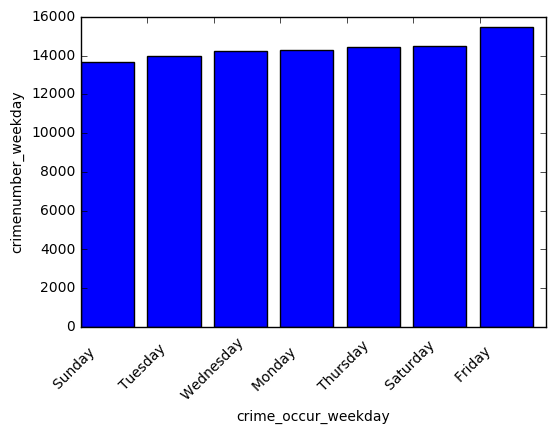

In [41]:
result= _
result.bar()
!echo 'number of crime occurred in different weekdays'

The above result shows how numbers of crime vary with different week days. We can see from the above table that Friday has the highest total number of crime, 15461, followed by Saturday, 14521, and Sunday has the lowest number of crime, which equals 13680, but number of total crime doesn't change much with different weekdays.

To summary, among the three factors: timeslot, season and weekdays, timeslot has the strongest effect on total number of crime, then we will dig deeper using it, and see whether crime type will be affected by this factor.

In [42]:
%%sql
SELECT OFFENSE ,COUNT(*) AS number FROM NYC2015crime
WHERE time = 'Afternoon'
GROUP BY OFFENSE;

7 rows affected.


offense,number
RAPE,314
GRAND LARCENY,18325
ROBBERY,7053
MURDER & NON-NEGL. MANSLAUGHTE,114
FELONY ASSAULT,8070
BURGLARY,5390
GRAND LARCENY OF MOTOR VEHICLE,3204


In [43]:
%%sql
Select OFFENSE, ROUND((CAST(Count(OFFENSE) AS DECIMAL) / (Select Count(*) From NYC2015crime)),4) as rate
From NYC2015crime
WHERE time = 'Afternoon'
Group By OFFENSE;

7 rows affected.


offense,rate
RAPE,0.0031
GRAND LARCENY,0.1822
ROBBERY,0.0701
MURDER & NON-NEGL. MANSLAUGHTE,0.0011
FELONY ASSAULT,0.0802
BURGLARY,0.0536
GRAND LARCENY OF MOTOR VEHICLE,0.0318


crime classification in afternoon


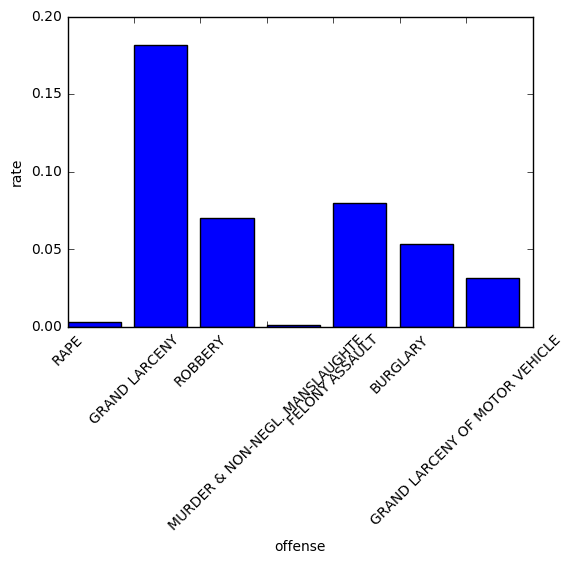

In [44]:
result= _
result.bar()
!echo 'crime classification in afternoon'

In [45]:
%%sql
SELECT OFFENSE ,COUNT(*) AS number FROM NYC2015crime
WHERE time = 'Morning'
GROUP BY OFFENSE;

7 rows affected.


offense,number
RAPE,233
GRAND LARCENY,13963
ROBBERY,3145
MURDER & NON-NEGL. MANSLAUGHTE,71
FELONY ASSAULT,4576
BURGLARY,5705
GRAND LARCENY OF MOTOR VEHICLE,1487


In [46]:
%%sql
Select OFFENSE, ROUND((CAST(Count(OFFENSE) AS DECIMAL) / (Select Count(*) From NYC2015crime)),4) as rate
From NYC2015crime
WHERE time = 'Morning'
Group By OFFENSE;

7 rows affected.


offense,rate
RAPE,0.0023
GRAND LARCENY,0.1388
ROBBERY,0.0313
MURDER & NON-NEGL. MANSLAUGHTE,0.0007
FELONY ASSAULT,0.0455
BURGLARY,0.0567
GRAND LARCENY OF MOTOR VEHICLE,0.0148


crime classification in morning


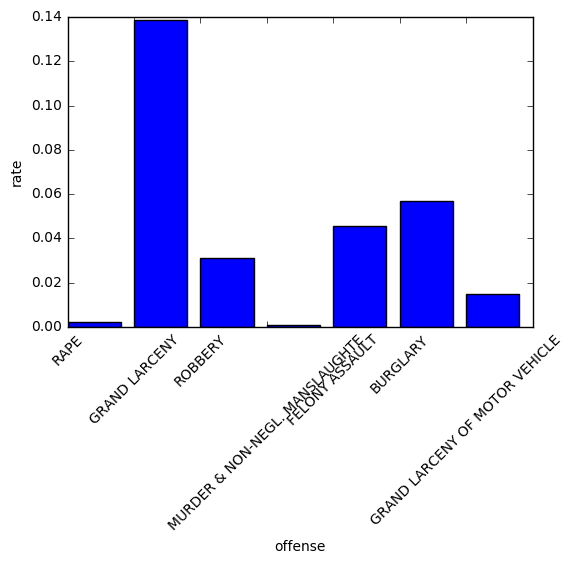

In [47]:
result= _
result.bar()
!echo 'crime classification in morning'

In [48]:
%%sql
SELECT OFFENSE ,COUNT(*) AS number FROM NYC2015crime
WHERE time = 'Evening'
GROUP BY OFFENSE;

7 rows affected.


offense,number
RAPE,594
GRAND LARCENY,8515
ROBBERY,6391
MURDER & NON-NEGL. MANSLAUGHTE,140
FELONY ASSAULT,7291
BURGLARY,3584
GRAND LARCENY OF MOTOR VEHICLE,2434


In [49]:
%%sql
Select OFFENSE, ROUND((CAST(Count(OFFENSE) AS DECIMAL) / (Select Count(*) From NYC2015crime)),4) as rate
From NYC2015crime
WHERE time = 'Evening'
Group By OFFENSE;

7 rows affected.


offense,rate
RAPE,0.0059
GRAND LARCENY,0.0846
ROBBERY,0.0635
MURDER & NON-NEGL. MANSLAUGHTE,0.0014
FELONY ASSAULT,0.0725
BURGLARY,0.0356
GRAND LARCENY OF MOTOR VEHICLE,0.0242


= crime classification in evening


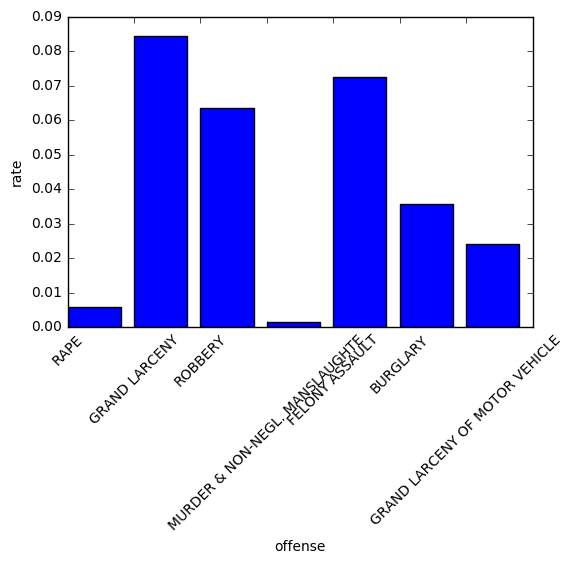

In [50]:
result= _
result.bar()
!echo = 'crime classification in evening'

In general, the order of crime class doesn't change with timeslop, the crime type that is most frequently happen is GRAND LARCENY no matter in morning, afternoon or evening, on the opposite, the crime type that is least frequently happen is MURDER & NON-NEGL.MANSLAUGHTE in all timeslop.

However, the occurrence probability of certain crime class does vary over timeslop, for example: even though GRAND LARCENY is most likely to happen in all three time period, the occurrence rate of it decreases obviously in the evening. And on the opposite, the occurrence rate or RAPE increases obviously in the evening compared with the other two time periods.

## Bonus (10 points for one of A or B)


### Option A - Automating ETL

Consider the work you did to load your original raw dataset and then transform it into a dimensional model for analysis.  What would it take to automate this process?  How often would you need to update the data?  Could you easily automate any data cleaning steps?  What checks would you need to put in place to ensure quality?  Would humans need to be involved, or could you automate it all?

Discuss.


### Option B - Augmenting dimensions

Considering your dimensional model, what external data could you find to augment it?  As in the case of bike trips, where weather might provide an interesting added dimension/context not present in the original data, you can probably find another source of data to complement your own model.  Identify one such source and add it to your model, demonstrating its value with a few new queries.

#### option B
Consider the properties of the data we use, educational level of each district will be helpful in digging deeper into the data.As plenty of paper has implied the strong relationship between education and crime, it's  reasonable and rational to include data related to education level when exploring factors affecting crime rate and crime type.
In this case, we could use numbers of schools(hign school, universities) in each district to represent the educational level of that certain district, These data is accessible on the public webset of local government, and will certainly provide us with important clues.